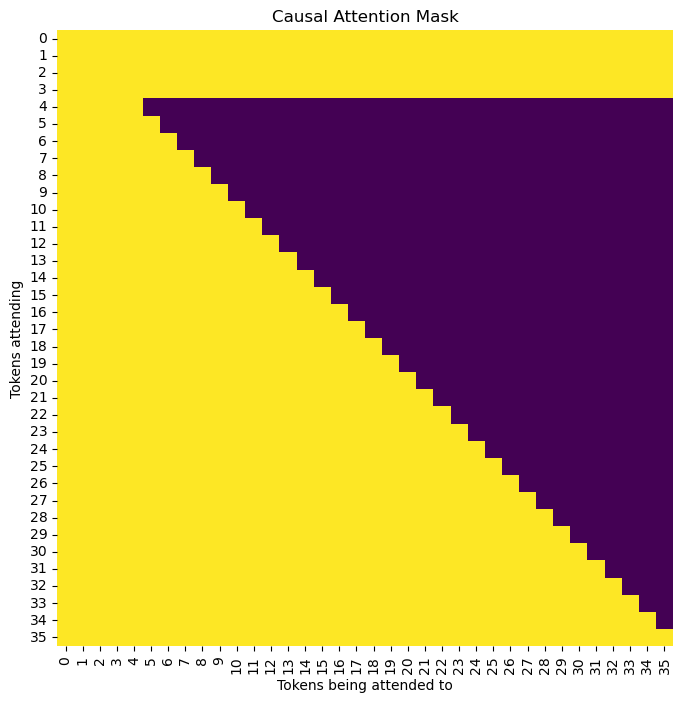

In [8]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns

class CustomAttentionModule:
    def __init__(self, mem_length, con_length):
        self.mem_length = mem_length
        self.con_length = con_length

    def memory_causal_mask(self):
        M = self.mem_length
        C = self.con_length
        T = M + C

        mask = torch.zeros(T, T, dtype=torch.bool)
        
        # Memory tokens can attend to everything
        mask[:M, :] = True

        # Everything can attend to memory tokens
        mask[:, :M] = True
        
        # Context tokens can only attend to previous context tokens
        mask[M:, M:] = torch.tril(torch.ones(C, C, dtype=torch.bool))
        
        # Broadcast to the batch size and head dimensions
        return mask.view(1, 1, T, T)

# Example Usage
mem_length = 4  # Memory length
con_length = 32  # Context length
module = CustomAttentionModule(mem_length, con_length)
mask = module.memory_causal_mask()

# Visualizing the mask
plt.figure(figsize=(10, 8))
sns.heatmap(mask[0, 0].numpy(), cmap="viridis", cbar=False, square=True)
plt.title("Causal Attention Mask")
plt.xlabel("Tokens being attended to")
plt.ylabel("Tokens attending")
plt.show()
